In [1]:
import os 
import cv2
import json
import numpy as np

from visualise import *
from mtcnn import MTCNN
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
img_load = 'test.jpg'
img = cv2.cvtColor(cv2.imread(img_load), cv2.COLOR_BGR2RGB)

In [3]:
IS_R = True
IS_O = True
P_COLOR = [255,0,0]
mtcnn = MTCNN(face_t = [0.3, 0.5, 0.7])

mtcnn.pnet = load_model('best_pnet.h5') 
mtcnn.rnet = load_model('best_rnet.h5') 
mtcnn.onet = load_model('best_onet.h5')

reg, mrks = mtcnn.detect_faces(img, is_r = IS_R, is_o = IS_O)

Metal device set to: Apple M1


2023-03-31 14:25:16.524221: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-31 14:25:16.524311: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


1/1 [==============================] - 0s 154ms/step


2023-03-31 14:25:17.089555: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-31 14:25:17.138036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 41ms/step


2023-03-31 14:25:17.290882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/48 [==========>...................] - ETA: 0s

2023-03-31 14:25:17.963854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 11ms/step


2023-03-31 14:25:18.370339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(-0.5, 611.5, 407.5, -0.5)

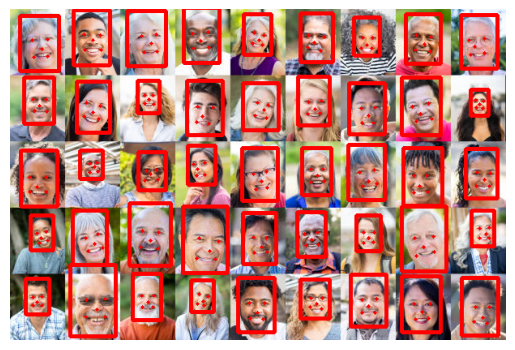

In [5]:
if reg.size > 0:
    img = visualise_boxes(img, reg, thickness = 3, color = P_COLOR)

if mrks.size > 0:
    for mrk in mrks:
        mrk = np.fix(mrk).astype(np.int32)
        cv2.circle(img, (mrk[0], mrk[1]), 2, P_COLOR, -1)
        cv2.circle(img, (mrk[2], mrk[3]), 2, P_COLOR, -1)
        cv2.circle(img, (mrk[4], mrk[5]), 2, P_COLOR, -1)
        cv2.circle(img, (mrk[6], mrk[7]), 2, P_COLOR, -1)
        cv2.circle(img, (mrk[8], mrk[9]), 2, P_COLOR, -1)

plt.imshow(img)
plt.axis('off')